# Example lattice model

In the lattice model, the public goods game is played each player in its  3x3 neighborhood. Therefore, a spatial dimension is introduced into the public goods game.

First, import the lattice model from the `pgg` module and make some settings.

In [5]:
from pgg import latticeModel
import numpy as np


# size of the lattice
gridx = 30
gridy = 30
nplayers = gridx*gridy

# rounds each player (approximately) plays
rounds = 100

# Public goods game settings     
# cost of participating
c = 1.

# multipliaction factor for the pot
r = 5.

# loners payoff
sigma = 1.

# allocate arrays to save the number of strategies and the their distribution
# on the lattice
strategies = np.zeros(shape=(rounds,3))
starategy_arr = np.zeros(shape=(rounds,gridx,gridy))

Initialize the lattice with a size `gridx` times `gridy`.

In [6]:
lm = latticeModel(grid=[gridx,gridy])

Let's play the public goods game one a lattice! In this code, `nplayers` times a random player is picked to play the public goods game with its neighbors. Then, all players are offered once the opportunity to compare their strategy to one player (randomely picked) in their neighborhood. Based on the payoff difference the player changes its strategy with a certain propability (look into the `pgg` module method `generelModel._revisionProtocol()` for more detail). After this payoffs are set to 0 and a new round starts.

In [7]:
for k in range(rounds):        
    for i in range(int(nplayers)):
        lm.playGame(c,r,sigma)

    for i in range(gridx):
        for j in range(gridy):
            lm.reviseStragey([i,j])

    lm.clearPayoffs()

    strategies[k,:] = lm.countStrategies()

    starategy_arr[k,:,:] = lm.getStrategyArray()

Now, lets see what results we got. In the animation white are cooperators, black defectors and grey loners.

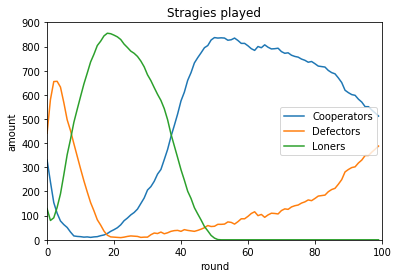

In [8]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap
from IPython.display import HTML

# Plot the strategy evolution over time
plt.title("Stragies played")
plt.xlabel("round")
plt.ylabel("amount")
plt.plot(np.arange(rounds),strategies[:,0],label="Cooperators")
plt.plot(np.arange(rounds),strategies[:,1],label="Defectors")
plt.plot(np.arange(rounds),strategies[:,2],label="Loners")
plt.ylim(0,nplayers)
plt.xlim(0,rounds)
plt.legend()

# Make an animation of the strategy distribution evolution 
def update(data):
    mat.set_data(data)
    return mat

def data_gen():
    kmax = len(starategy_arr[:,0,0])
    k=0

    while k<kmax:
        yield starategy_arr[k,:,:]
        k+=1

fig, ax = plt.subplots()
cmap = ListedColormap(['w', 'k','grey'])
mat = ax.matshow(starategy_arr[0,:,:],cmap=cmap)
ani = animation.FuncAnimation(fig, update, data_gen, interval=100)
plt.close(2)
HTML(ani.to_html5_video())
